# Sentiment Analysis Preprocessing Step

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Splitting

1. Frist We import the data set and packages.
2. Then, analyse the data whether there is missing or  NaN (Not a Number) values or such, if it does, drop those values. 
3. Finally, process the Sentiment Scoring Model with original rate from dataset to make our dataset splitted in fine term with sentiment.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

"""
Through Vader module, we will divide our dataset in two types : Negative and Positive
With sentiment analysis scores on user review and rating, we could get fine division of sets.

The Vader module, need to be downloaded
"""
text_reviews = pd.read_csv('/content/drive/MyDrive/Team2_LDA/Datasets/tripadvisor_hotel_reviews.csv')
text_reviews

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
19596,"best kept secret 3rd time staying charm, not 5...",5
19597,great location price view hotel great quick pl...,4
19598,"ok just looks nice modern outside, desk staff ...",2
19599,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
"""
Drop NaN or Missing Values for better result.
Since we got dataset of texts, we don't get further insull.sum() function.
"""
text_reviews.dropna()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
19596,"best kept secret 3rd time staying charm, not 5...",5
19597,great location price view hotel great quick pl...,4
19598,"ok just looks nice modern outside, desk staff ...",2
19599,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
# Bring sentiment scoring model to divide our dataset in two according sentiment score.
Sentiment_analysis = SentimentIntensityAnalyzer()

"""
 Function will return scores computed by sentiment analysis
 1 = Positive, 0.75 > Neutral > 0, 0 > Negative
 Unfortunately we don't need the Neutrals.
"""
def scoring_unit(review):
  analyzed_scores = Sentiment_analysis.polarity_scores(review)
  scoring = 0.5

  if analyzed_scores['compound'] >= 0.75:
    scoring = 1
  elif analyzed_scores['compound'] < 0:
    scoring = 0

  return scoring

def pos_neg_splitter(review):
  # Make Each two different dataset to contain each scored reviews.
  pos_reviews = pd.DataFrame(columns = ['review'])
  neg_reviews = pd.DataFrame(columns = ['review'])
  idx_pos = 0
  idx_neg = 0
  
  #Save the reviews with the score data and ratings from Users
  for idx, row in text_reviews.iterrows():
    
    # Break it, since we don't want to read false datas.
    if idx == len(text_reviews['Review']): break 
    
    temp_score = scoring_unit(row['Review'])
    
    # With the computed sentiment score and Rating, we could make an assumption of accurate sentiment of reviews.
    if temp_score and row['Rating'] >= 4:
      pos_reviews.at[idx_pos, 'review'] = row['Review']
      idx_pos += 1
      
    elif not temp_score and row['Rating'] <= 2:
      neg_reviews.at[idx_neg, 'review'] = row['Review']
      idx_neg += 1
    
  return pos_reviews, neg_reviews

In [ ]:
# Check our divided dataset
pos_reviews, neg_reviews = pos_neg_splitter(text_reviews)
pos_reviews

,review
0,nice hotel expensive parking got good deal sta...
1,"unique, great stay, wonderful time hotel monac..."
2,"great stay great stay, went seahawk game aweso..."
3,love monaco staff husband stayed hotel crazy w...
4,"cozy stay rainy city, husband spent 7 nights m..."
...,...
14382,great play stay stay loyal inn package deal ha...
14383,great choice wife chose best western quite bit...
14384,good bed clean convenient just night happy sta...
14385,"best kept secret 3rd time staying charm, not 5..."


In [ ]:
neg_reviews

,review
0,"bad choice, booked hotel hot wire called immed..."
1,warwick bad good reviews warwick shocks staff ...
2,"austin powers decor familiar, hotel seattlewhe..."
3,"hated inn terrible, room-service horrible staf..."
4,disappointed arranging anticipated girl weeken...
...,...
1257,not stay hotel brought group february worst ho...
1258,returning la concha nightmare surprising hotel...
1259,deceptive staff deceptive desk staff claiming ...
1260,not impressed unfriendly staff checked asked h...


In [ ]:
#Free memories.
del [[text_reviews]]

### Data Exploration

1. We are going to get through some exploration among our dataset.
2. A Rate of POS / NEG 
3. Frequency of all words among POS & NEG
4. Frequent rankings of each dataset

##### Built Sentiment Scored Ratio Observation

In [ ]:
def ratio_diagram(POSITIVEs, NEGATIVEs):
  #Lets see the ratio of POS/ NEG in our dataset
  sum_of_attributes = len(POSITIVEs) + len(NEGATIVEs)
  rate_of_POSITIVEs = len(POSITIVEs) / sum_of_attributes * 100
  rate_of_NEGATIVEs = 100 - rate_of_POSITIVEs
  
  ratio = [rate_of_POSITIVEs , rate_of_NEGATIVEs]
  labels = ['POSITIVE', 'NEGATIVE']
  wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
  
  plt.pie(ratio, labels= labels, autopct = '%.2f%%', wedgeprops=wedgeprops)
  plt.show

##### Rate Result in Diagram

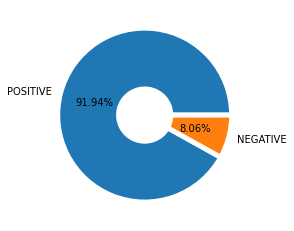

In [ ]:
ratio_diagram(pos_reviews, neg_reviews)

##### Buliding Word_Cloud for dataset exploration

In [ ]:
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 
from wordcloud import WordCloud
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Make a tag with those POS signs, to choose the one with the NOUN tags.
def tagging(tags):

  if tags.startswith('J'):
    return wordnet.ADJ 

  elif tags.startswith('V'):
    return wordnet.VERB 

  elif tags.startswith('N'):
    return wordnet.NOUN

  elif tags.startswith('R'):
    return wordnet.ADV

In [ ]:
# The lemmatizing process will took the sentences splitted in words, in terms of original form.
def lemmatizing(review_dataframe):
  
  #Made all sentences in lower cases to make easier.
  review_dataframe = review_dataframe.lower() 
  """
  This be the point of shifts in each word to word
  Our word standard is words with a to z, more than three letters
  """
  distirbution_code = r'\b[a-z]{3,}\b'

  # Tokenize { Word }
  tokenized_words = nltk.regexp_tokenize(review_dataframe, distirbution_code) 

  # List of tuple (Word, pos_tag)
  tagged_tokens = nltk.pos_tag(tokenized_words)  
  
  """
  Customized extra stop_words : Which is the list of words we don't want to take weights on.
  This is because we want to specify which point customers felt good/bad with the hotel.
  For example, in reviews it is obvious that the word "hotel" must be the most frequent.                 
  """

   # This contains simple menatory words like, 'is' 'are' 'the' 'she', etc.
  stopping_words = stopwords.words('english')
  stopping_words.extend(['hotel','everything','anything','nothing','thing', 'day', 'night', 'time', 'stay'])
  stopping_words = set(stopping_words)

  # Call Function from WordNet.
  WN_LEM = WordNetLemmatizer()                             

  lemmatized_words = []

  # Since we need the factor that affects in evaluation of hotel services, we only need NOUNs.
  for word, tag in tagged_tokens:
    if not word in stopping_words and not word in string.punctuation:
      if tag.startswith('N'):
        lemmatized_words.append(WN_LEM.lemmatize(word, tagging(tag)))

  return lemmatized_words

In [ ]:
def Cloud_plot(review_data, color, title):

  #Pass our dataframe in list
  reviews = review_data['review'].tolist()

  # Call function "lemmatized_tokens", it will combine all list of words with ' ' : additional space } for distinguisher
  lemmatized_text = lemmatizing(' '.join(reviews)) # list : lemmatized and be words in each component of list, including ' '/ exp) never mind I'll find some place better -> mind place
  stringof_word = ' '.join(lemmatized_text) # string : combination of words.

  # Function wordcloud will produce an image of words, according to the frequency of words ammong sentences.
  wordcloud = WordCloud(collocations = False, background_color = color, 
                        width=1600, height=800, 
                        margin=2, min_font_size=20, 
                        relative_scaling = 0.75).generate(stringof_word)

  plt.figure(figsize = (10, 7.5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.figtext(.5,.8,title,fontsize = 20, ha= 'center')
  plt.show()

  # We need the all combined strings for further research, and lemmatized_text for LDA topic. (It will get more cleansed when we used lemmatized words.)
  return stringof_word, lemmatized_text

##### WordCloud Result

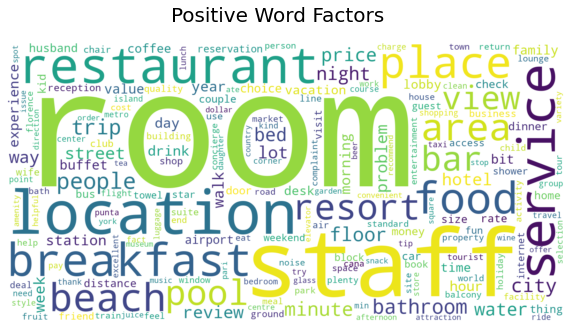

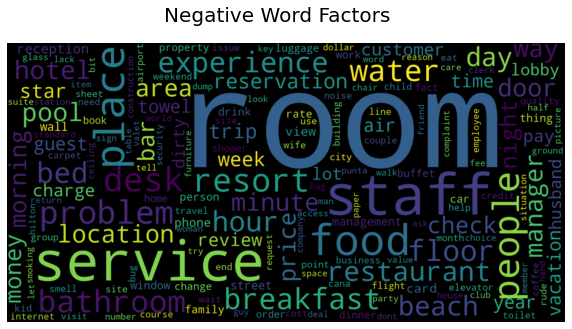

In [ ]:
# Wordcoulds for Positive Reviews
pos_words, pos_lem = Cloud_plot(pos_reviews, 'white', 'Positive Word Factors')

# WordCoulds for Negative Reviews
neg_words, neg_lem = Cloud_plot(neg_reviews, 'black', 'Negative Word Factors')

##### Simple Tendancy research

In [ ]:
"""
These words are picked from the worldcloud above. 
Some of them are in common between positive and negative, which will be gained same as from LDA model.
It will return the most frequent seven words in the strings.
"""
keyword_tags = ['room', 'staff', 'location', 'service', 'breakfast', 
                'place', 'restaurant', 'food', 'beach', 'resort',
                'problem', 'people', 'desk', 'bathroom', 'floor']

In [ ]:
def tendancy_searching(list_of_tags, target_string):
  temp_dict = {}

  for tags in list_of_tags:
    temp_dict[tags] = target_string.count(tags)
    #Sorting our dict type result for easier research
  
  result = sorted(temp_dict.items(), key=lambda x: x[1], reverse=True)
  
  # Since it's sorted with decreasing order, : n] will get N top of words.
  return result[:10]

##### Tendancy Result

In [ ]:
# We'll be able to see top N words which exists on each word strings.
print("POSTIVIE : ", tendancy_searching(keyword_tags, pos_words))
print("NEGATIVE : ", tendancy_searching(keyword_tags, neg_words))

POSTIVIE :  [('room', 33782), ('staff', 12202), ('location', 8448), ('service', 6830), ('restaurant', 6484), ('breakfast', 6327), ('food', 6231), ('place', 6185), ('beach', 5126), ('resort', 4723)]
NEGATIVE :  [('room', 3848), ('staff', 763), ('service', 736), ('food', 516), ('place', 502), ('people', 413), ('desk', 372), ('resort', 358), ('problem', 353), ('bathroom', 334)]


# LDA Modeling Step
Finally! We are now good to go for implementaion step!

### Implementation of LDA models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
def LDA_model(lemmatized_words):
  """
  CountVectorizer : This give us another standard of selecting words among list of word bunches. We could fit with this but we need more than that
  strip_accents : Encoded type of words
  lowercase : Since we made lemmatized above, our word is with all lowercase
  max_df : In our assumption, like as we remove the word 'hotel' for gaining true factor of evaluation, the word which appears more than 75% of chance might not good for factorize.
  min_df : If the word that doesn't appear more than this value among all other groups, it might be that important factor.
  max_df and min_df is a value for efficient and accurate topic selection.
  """
  text2vec = CountVectorizer(strip_accents = 'unicode', 
                             lowercase = True, 
                             max_df = 0.75, 
                             min_df = 100)
  
  # Apply TfidVectorizer with the parameter of CountVectorizer. It will select proper words.
  text_vectorizer = TfidfVectorizer(**text2vec.get_params())
  text_in_matrix = text_vectorizer.fit_transform(lemmatized_words)

  LDA = LatentDirichletAllocation()
  
  """
  n_components : the number of topic assumptions dragged out the word from all the list of sentences.
  learning_deacy : the rate of learning_deacy that will be applied every iterations among learning. { for each word weights, by this we select words that follows the topic }
  learning_method : choosing the learning method, the original paper tried batch learning with about 600 reviews, and since we have 15,000 so we choose going with online.
  """
  param_grid = {'n_components' : [1, 2, 3],
                'learning_decay' : [0.5, 0.7, 0.75, 0.8, 0.9],
                'learning_method' : ['online']}
  
  model = GridSearchCV(LDA, param_grid)
  model.fit(text_in_matrix)

  best_model = model.best_estimator_

  print("Best Parameter : ", model.best_params_)
  print("Model Log Likelihood Score: ", model.best_score_)
  print("Model Perplexity: ", best_model.perplexity(text_in_matrix))

  return best_model, text_vectorizer

In [ ]:
# Since we have more data on POSITIVEs, make our model be on that
LDA_best_pos, LDA_vectorizer_pos = LDA_model(pos_lem)
LDA_best_neg, LDA_vectorizer_neg = LDA_model(neg_lem)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning,


Best Parameter :  {'learning_decay': 0.75, 'learning_method': 'online', 'n_components': 1}
Model Log Likelihood Score:  -528795.2470952942
Model Perplexity:  339.74406139959166


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning,


Best Parameter :  {'learning_decay': 0.7, 'learning_method': 'online', 'n_components': 1}
Model Log Likelihood Score:  -15930.84623987137
Model Perplexity:  51.73220520103631


In [ ]:
def display_topics(LDA, feature_names, n_top_words):
  
  topic_dict = {}

  for topic_idx, topic in enumerate(LDA.components_):
    topic_dict["Topic words"]= ['{}'.format(feature_names[i]) for i in topic.argsort()[:-n_top_words - 1:-1]]
    topic_dict["Topic weights"]= ['{:.2f}'.format(topic[i]) for i in topic.argsort()[:-n_top_words - 1:-1]]
  
  return pd.DataFrame(topic_dict)

In [ ]:
pos_result = display_topics(LDA_best_pos, LDA_vectorizer_pos.get_feature_names(), n_top_words = 20)
neg_result = display_topics(LDA_best_neg, LDA_vectorizer_neg.get_feature_names(), n_top_words = 20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Result of our LDA Model

In [ ]:
pos_result

,Topic words,Topic weights
0,room,29098.84
1,staff,12029.83
2,location,8240.86
3,service,6759.41
4,restaurant,6467.17
5,breakfast,6318.61
6,food,5972.94
7,place,5869.68
8,area,4970.54
9,beach,4944.32


In [ ]:
neg_result

,Topic words,Topic weights
0,room,3411.27
1,staff,763.10
2,service,723.79
3,food,516.75
4,place,475.92
5,people,416.54
6,resort,377.95
7,problem,361.72
8,desk,343.29
9,bathroom,330.01


In [ ]:
final_result = pd.concat([pos_result, neg_result], axis = 1)
final_result

,Topic words,Topic weights,Topic words,Topic weights
0,room,29098.84,room,3411.27
1,staff,12029.83,staff,763.10
2,location,8240.86,service,723.79
3,service,6759.41,food,516.75
4,restaurant,6467.17,place,475.92
5,breakfast,6318.61,people,416.54
6,food,5972.94,resort,377.95
7,place,5869.68,problem,361.72
8,area,4970.54,desk,343.29
9,beach,4944.32,bathroom,330.01


In [ ]:
final_result.columns = ['POS Word','POS Weight','NEG Word', 'NEG Weight']
final_result

,POS Word,POS Weight,NEG Word,NEG Weight
0,room,29098.84,room,3411.27
1,staff,12029.83,staff,763.10
2,location,8240.86,service,723.79
3,service,6759.41,food,516.75
4,restaurant,6467.17,place,475.92
5,breakfast,6318.61,people,416.54
6,food,5972.94,resort,377.95
7,place,5869.68,problem,361.72
8,area,4970.54,desk,343.29
9,beach,4944.32,bathroom,330.01


### Saving Models & Datasets

In [ ]:
# Savings for further use.
import joblib

final_result.to_csv('/content/drive/MyDrive/Team2_LDA/Datasets/Final_result.csv', index = False)
pos_reviews.to_csv('/content/drive/MyDrive/Team2_LDA/Datasets/POS_reviews.csv', index = False)
neg_reviews.to_csv('/content/drive/MyDrive/Team2_LDA/Datasets/NEG_reviews.csv', index = False)

joblib.dump(LDA_best_pos, '/content/drive/MyDrive/Team2_LDA/LDA_best_pos.pkl')
joblib.dump(LDA_best_neg, '/content/drive/MyDrive/Team2_LDA/LDA_best_neg.pkl')

['/content/drive/MyDrive/Team2_LDA/LDA_best_neg.pkl']

In [ ]:
del[[pos_reviews, neg_reviews, pos_result, neg_result, final_result]]